# Explore the Data

In [331]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.manifold as manifold
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import scipy
import os

## Setup the dataframe

In [2]:
df_data = pd.read_csv("MammalsDataSet/MammalsDataset2020.csv", header=None)

with open("MammalsDataSet/AnimalNames.txt") as f:
    animal_names = f.readlines()
    
animal_names = [a.strip() for a in animal_names]

with open("MammalsDataSet/PropertyNames.csv") as f:
    property_names = f.read()
    
property_names = property_names.split("\n")[:-1]


df_data = df_data.rename(index=dict(enumerate(animal_names)), columns=dict(enumerate(property_names)))
df_data = df_data/100

In [3]:
df_data

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,plains,forest,fields,jungle,mountains,ocean,ground,water,tree,cave
antelope,0.0000,0.0000,0.0000,0.0000,0.1234,0.0000,0.0000,0.0000,0.1611,0.0919,...,0.5479,0.0494,0.4097,0.0000,0.2232,0.0000,0.5714,0.0000,0.0000,0.0123
grizzly bear,0.3925,0.0139,0.0000,0.7414,0.0375,0.0000,0.0000,0.0000,0.0125,0.0000,...,0.0000,0.7740,0.1000,0.0250,0.4385,0.0000,0.4777,0.0764,0.0979,0.5314
killer whale,0.8340,0.6479,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.6849,0.3269,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.8828,0.0000,0.7949,0.0000,0.0000
beaver,0.1938,0.0000,0.0000,0.8781,0.0750,0.0000,0.0000,0.0000,0.0000,0.0750,...,0.0000,0.1906,0.1562,0.0000,0.0000,0.0000,0.3125,0.6562,0.0000,0.0000
dalmatian,0.6958,0.7333,0.0000,0.0639,0.0000,0.0000,0.0000,0.0000,0.3708,1.0000,...,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.4139,0.0125,0.0625,0.0000
persian cat,0.1938,0.5009,0.2944,0.0898,0.3819,0.0000,0.0000,0.0000,0.1793,0.0625,...,0.1055,0.0898,0.0977,0.0625,0.0625,0.0000,0.4750,0.0125,0.0264,0.0000
horse,0.4490,0.4291,0.0444,0.6941,0.3594,0.0000,0.0000,0.0000,0.2229,0.1580,...,0.5254,0.1076,0.7014,0.0333,0.1622,0.0000,0.5652,0.0222,0.0000,0.0000
german shepherd,0.4354,0.1588,0.0500,0.5416,0.2682,0.0312,0.0250,0.0038,0.4878,0.1159,...,0.2133,0.1789,0.1250,0.0000,0.1125,0.0000,0.7261,0.0375,0.0000,0.0250
blue whale,0.1292,0.0438,0.6708,0.0750,0.2560,0.0000,0.0000,0.0000,0.1531,0.2375,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.7411,0.0000,0.7661,0.0000,0.0000
siamese cat,0.5621,0.2351,0.1222,0.3269,0.3813,0.0000,0.0000,0.0000,0.3583,0.0694,...,0.0778,0.0444,0.1000,0.0222,0.0556,0.0000,0.6042,0.0222,0.1000,0.0111


In [4]:
feature_array = df_data.to_numpy()
animal_array = np.diag(np.ones((50)))
data_array = np.concatenate((animal_array, feature_array), axis=1)
data_array_torch = torch.tensor(data_array)

## Clustering Analysis

### Cluster the Data Affinity Propogation

In [5]:
affinity_clustering = AffinityPropagation(random_state=1).fit(feature_array)
affinity_clustering.labels_

array([6, 3, 0, 4, 5, 5, 6, 5, 0, 5, 4, 4, 3, 2, 3, 6, 1, 0, 2, 1, 6, 3,
       6, 0, 1, 4, 4, 2, 4, 4, 6, 3, 5, 4, 3, 0, 6, 6, 6, 6, 3, 6, 3, 4,
       3, 5, 0, 4, 6, 0])

### Cluster the Data Agglomerative Clustering

In [6]:
agglo_clustering = AgglomerativeClustering(n_clusters=7).fit(feature_array)
agglo_clustering.labels_

array([1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 4, 4, 5, 6, 5, 1, 3, 2, 6, 3, 1, 5,
       1, 2, 3, 4, 4, 6, 4, 3, 1, 5, 0, 4, 5, 2, 1, 1, 0, 1, 5, 1, 5, 4,
       0, 0, 2, 4, 1, 2])

### Similarity Matrix

In [131]:
def cos_sim(a, b): 
#     return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cosine_similarity(a.reshape(1,-1), b.reshape(1,-1))

def inverse_distance(a,b):
    distance = np.linalg.norm(b-a)
    return 1/distance if distance != 0 else np.Inf

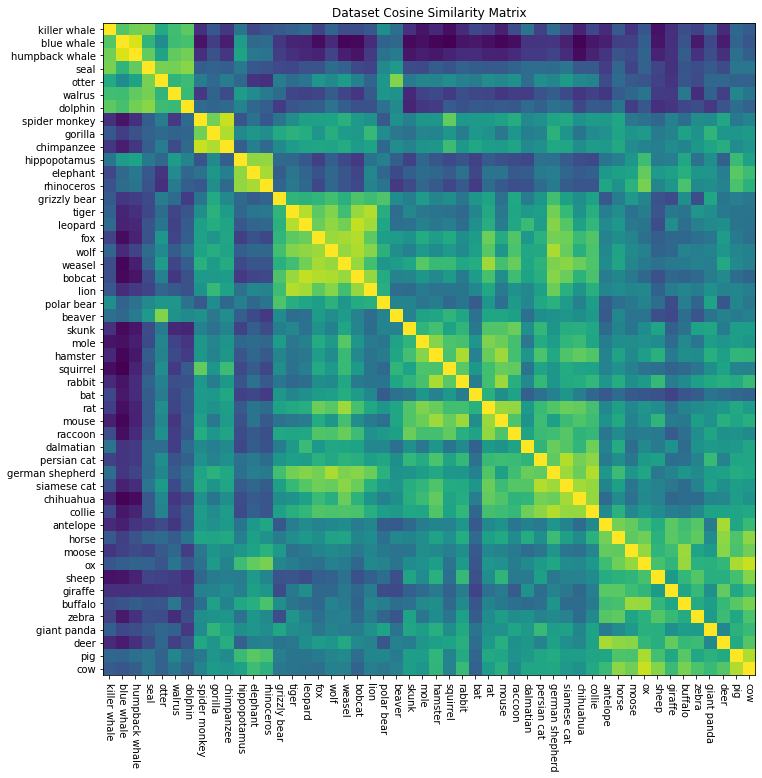

In [410]:
def compute_similarity_matrix(feature_array, similarity_measure="cosine"):
    
    num_animals = feature_array.shape[0]
    
    similarity_matrix = np.zeros((num_animals, num_animals))

    for i in range(num_animals):

        animal_rep = feature_array[i,:]

        for j in range(num_animals):

            comparator = feature_array[j,:]
            
            if similarity_measure == "cosine":
                sim = cos_sim(animal_rep, comparator)
            elif similarity_measure == "inverse_euclid":
                sim = inverse_distance(animal_rep, comparator)
            else:
                raise Exception("Similarity measure " + similarity_measure + " not implemented")

            similarity_matrix[i,j] = sim
            
    return similarity_matrix


def sorted_similarity_matrix(cluster_labels, feature_array, animal_names, similarity_measure="cosine", visualize=True, plot_title="Cosine Similarity Matrix", save_file=None):

    indexed_cluster_labels = sorted([(i,cluster_labels[i],animal_names[i]) for i in range(len(cluster_labels))], key=lambda x: x[1])
    
    clustered_array = np.zeros(feature_array.shape)
    sorted_animal_names = []

    for j in range(len(indexed_cluster_labels)):

        i, _, name = indexed_cluster_labels[j]
        clustered_array[j,:] = feature_array[i, :]
        sorted_animal_names.append(name)

    similarity_matrix = compute_similarity_matrix(clustered_array, similarity_measure=similarity_measure)

    if visualize:
        fig, ax = plt.subplots()
        ax.imshow(similarity_matrix)
        ax.set_title(plot_title)
        ax.set_xticks(range(len(sorted_animal_names)))
        ax.set_yticks(range(len(sorted_animal_names)))
        ax.set_xticklabels(sorted_animal_names, rotation=270)
        ax.set_yticklabels(sorted_animal_names)
        fig.set_size_inches(12,12)

        if not (save_file is None):
            plt.savefig(save_file)
    
    return similarity_matrix
    
    
data_similarity_matrix = sorted_similarity_matrix(affinity_clustering.labels_,
                                                     feature_array,
                                                     animal_names,
                                                     plot_title="Dataset Cosine Similarity Matrix",
                                                     save_file="figures/data_similarity_matrix.png")

### PCA

In [9]:
features_PCA = PCA(n_components=15).fit_transform(feature_array)
features_PCA.shape

(50, 15)

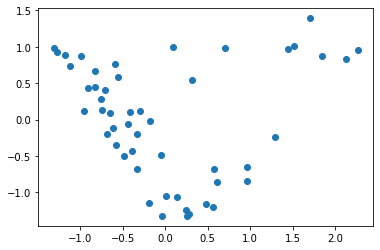

In [10]:
x = features_PCA[:,0]
y = features_PCA[:,1]

plt.scatter(x,y)

### TSNE

In [11]:
tsne_reduced = manifold.TSNE(n_components=2,
                    perplexity=7.5,
                    early_exaggeration=12,
                    random_state=1).fit_transform(feature_array)
# feature_array_reduced

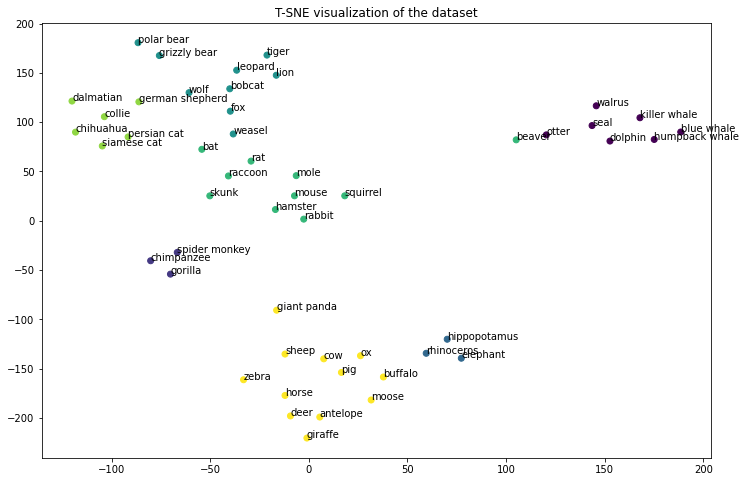

In [12]:
x = tsne_reduced[:,0]
y = tsne_reduced[:,1]
# z = tsne_reduced[:,2]

fig, ax = plt.subplots()
ax.scatter(x,y,c=affinity_clustering.labels_)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=x,ys=y,zs=z,c=affinity_clustering.labels_)

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
#     z_coor = z[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("T-SNE visualization of the dataset")

plt.savefig("figures/dataset_tsne.png")

In [13]:
data_array_torch

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0123],
        [0.0000, 1.0000, 0.0000,  ..., 0.0764, 0.0979, 0.5314],
        [0.0000, 0.0000, 1.0000,  ..., 0.7949, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0208, 0.3341, 0.0727],
        [0.0000, 0.0000, 0.0000,  ..., 0.0055, 0.0000, 0.0032],
        [0.0000, 0.0000, 0.0000,  ..., 0.7140, 0.0000, 0.0000]],
       dtype=torch.float64)

## Design Neural Net

In [19]:
class Net(nn.Module):
    def __init__(self, hidden_layer_size):
        super(Net, self).__init__()
        
        # Input layer linear
        self.input_weights = nn.Linear(135, hidden_layer_size).double()
        
        # Output layer linear
        self.output_weights = nn.Linear(hidden_layer_size, 135).double()
        
        
        
    def forward(self, x):
        
        input_projection = self.input_weights(x)
        hidden_units = torch.tanh(input_projection)
        
        output_projection = self.output_weights(hidden_units)
        output = torch.sigmoid(output_projection)
        
        return output

In [22]:
data_array_torch.shape[0]

50

## Training

### Training Procedures

In [35]:
def train_model(dataset, hidden_layer_size, epoch_number, seed=1, save=True, print_every=100):
    
    epoch_size = dataset.shape[0]
    
    my_net = Net(hidden_layer_size)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(my_net.parameters())
    
    loss_trajectory = []
    
    torch.manual_seed(seed)
    
    for epoch in range(epoch_number):
        item_order = torch.randperm(epoch_size)

        item_loss_list = []
        for i in item_order:

            inp = data_array_torch[i,:]

            optimizer.zero_grad()
            output = my_net(inp)
            loss = loss_function(output, inp)

            item_loss_list.append(loss)

            loss.backward()
            optimizer.step()

        epoch_loss = torch.stack(item_loss_list).sum(0)
        loss_trajectory.append(epoch_loss)
        
        if epoch % print_every == 0:
            print("Epoch:", epoch)
            print("Loss:", epoch_loss)
            print()
            
    if save:
        directory = "saved_models/hidden_units_" + str(hidden_layer_size) + "/"
        
        if not os.path.isdir(directory):
            os.mkdir(directory)
        
        save_path = directory + "seed_" + str(seed) + ".pt"
        torch.save(my_net, save_path)
            
            
    return my_net, loss_trajectory


def train_multiple_nets(dataset, hidden_unit_range, seed_range, epochs):
    
    for unit_num in hidden_unit_range:
        
        for seed in seed_range: 
            
            print("Units:", unit_num)
            print("Seed:", seed)
            print()
            
            train_model(dataset, unit_num, epochs, seed=seed, save=True)

### Train nets with multiple hidden unit settings and seeds

In [37]:
# Takes a long time to run
# train_multiple_nets(data_array_torch, [10, 20, 30, 40, 50], [1, 2, 3, 4, 5], 2000)

In [38]:
epoch_number = 500 
my_net, loss_trajectory = train_model(data_array_torch, 50, epoch_number, save=False)

Epoch: 0
Loss: tensor(6.7382, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 100
Loss: tensor(0.0618, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 200
Loss: tensor(0.0095, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 300
Loss: tensor(0.0072, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 400
Loss: tensor(0.0043, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 500
Loss: tensor(0.0038, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 600
Loss: tensor(0.0043, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 700
Loss: tensor(0.0040, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 800
Loss: tensor(0.0030, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 900
Loss: tensor(0.0022, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1000
Loss: tensor(0.0030, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1100
Loss: tensor(0.0021, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 1200
Loss: tensor(0.0026, dtype=torch.float64, grad_fn=<S

### Loss Graph

Text(0, 0.5, 'Loss')

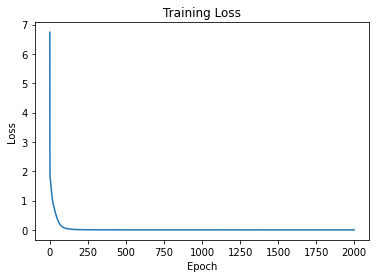

In [40]:
start_point = 0
plt.plot(range(start_point,epoch_number), torch.stack(loss_trajectory).detach().numpy()[start_point:])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Model Clustering Analysis

In [98]:
my_net = torch.load("saved_models/hidden_units_50/seed_1.pt")

In [99]:
hidden_unit_activations = my_net.input_weights.forward(data_array_torch).detach().numpy()

In [43]:
affinity_clustering.labels_

array([6, 3, 0, 4, 5, 5, 6, 5, 0, 5, 4, 4, 3, 2, 3, 6, 1, 0, 2, 1, 6, 3,
       6, 0, 1, 4, 4, 2, 4, 4, 6, 3, 5, 4, 3, 0, 6, 6, 6, 6, 3, 6, 3, 4,
       3, 5, 0, 4, 6, 0])

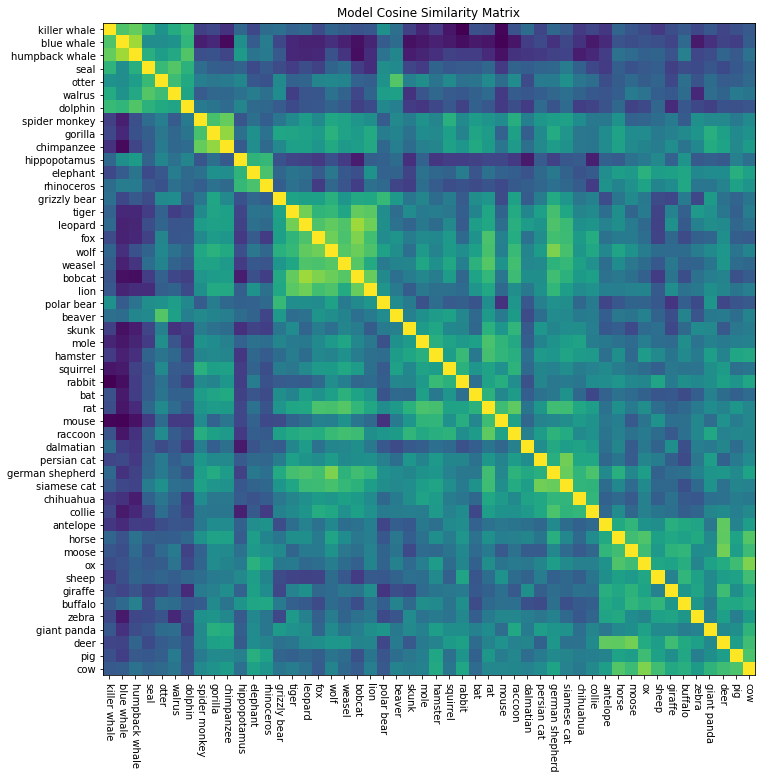

In [411]:
model_similarity_matrix = sorted_similarity_matrix(affinity_clustering.labels_,
                                                      hidden_unit_activations,
                                                      animal_names,
                                                      plot_title="Model Cosine Similarity Matrix",
                                                      save_file="figures/model_similarity_matrix.png")

### Model Correlations

In [107]:
corrs = []

for i in [1,2,3,4,5]:
    model = torch.load("saved_models/hidden_units_50/seed_" + str(i) + ".pt")
    hidden_units = model.input_weights.forward(data_array_torch).detach().numpy()
    sim_matrix = sorted_similarity_matrix(affinity_clustering.labels_, hidden_units, animal_names, visualize=False)
    cor = scipy.stats.pearsonr(sim_matrix.flatten(), data_similarity_matrix.flatten())[0]
    corrs.append(cor)
    
corrs
    

[0.9358689251172312,
 0.9210757673274592,
 0.9297413305810036,
 0.9248470591719584,
 0.9299068258192664]

### Compute Model Representation and Cluster

In [120]:
hidden_unit_activations = my_net.input_weights.forward(data_array_torch).detach().numpy()

# hidden_unit_activations
model_clustering = AffinityPropagation(random_state=1).fit(hidden_unit_activations)
model_clustering.labels_

array([7, 0, 1, 5, 0, 0, 7, 0, 1, 0, 4, 4, 6, 3, 6, 7, 2, 1, 3, 2, 7, 6,
       7, 5, 2, 4, 4, 3, 7, 4, 7, 0, 0, 4, 4, 5, 7, 7, 7, 7, 6, 7, 6, 4,
       5, 0, 5, 4, 7, 1])

### TSNE for model representation

In [118]:
tsne_model = manifold.TSNE(n_components=2,
                    perplexity=7.5,
                    early_exaggeration=12,
                    random_state=4).fit_transform(hidden_unit_activations)

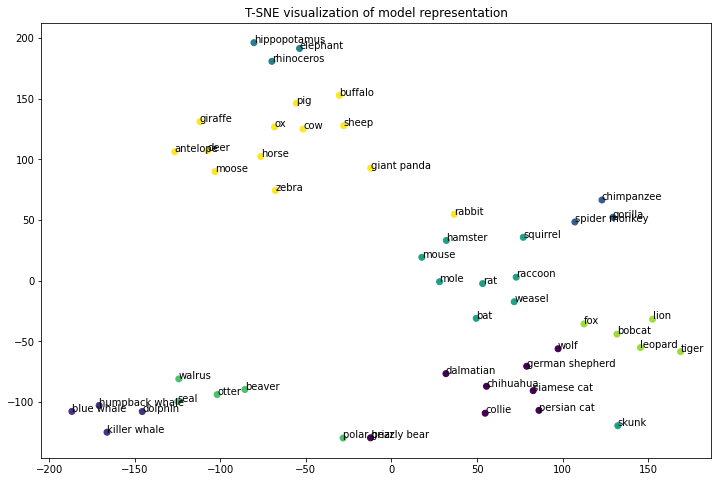

In [416]:
x = tsne_model[:,0]
y = tsne_model[:,1]

fig, ax = plt.subplots()
ax.scatter(x,y,c=model_clustering.labels_)

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("T-SNE visualization of model representation")
plt.savefig("figures/model_tsne.png")

### Average Correlation across hidden unit sizes

In [138]:
hidden_unit_sizes = [10, 20, 30, 40, 50]
seeds = [1,2,3,4,5]

ave_corr = []

for hu in hidden_unit_sizes:
    corrs = []
    for s in seeds:
        model = torch.load("saved_models/hidden_units_" + str(hu) + "/seed_" + str(s) + ".pt")
        hidden_units = model.input_weights.forward(data_array_torch).detach().numpy()
        sim_matrix = sorted_similarity_matrix(affinity_clustering.labels_, hidden_units, animal_names, visualize=False)
        cor = scipy.stats.pearsonr(sim_matrix.flatten(), data_similarity_matrix.flatten())[0]
        corrs.append(cor)
        
    ave_corr.append(np.round(np.mean(corrs), decimals=2))
    
ave_corr

[0.51, 0.56, 0.66, 0.8, 0.93]

Directions to do:
RSA of the data and the model values
3d visualization of dimensionality reduction
Numbers for clusters

# Random Walks in Memory

In [146]:
hidden_unit_activations

array([[-1.55513909,  0.32921446, -1.22071664, ...,  2.04337034,
         1.81340796, -1.34158079],
       [ 2.35462688,  1.07732648, -1.8101433 , ...,  2.82191803,
        -1.16571366,  2.3618365 ],
       [ 0.44333111,  0.88264484, -2.56165927, ...,  2.72953375,
        -2.2236848 ,  0.86334907],
       ...,
       [-1.03896162,  1.80539931, -2.04057172, ...,  3.29006116,
         1.10919718,  0.66899958],
       [-0.8843244 ,  1.16155513, -1.80603219, ...,  1.47264905,
         0.87789054,  1.27606003],
       [-0.98173795,  0.09988875, -1.85144737, ...,  0.92018448,
        -2.64699861, -1.19848058]])

### Compute Similarity

In [399]:
similarity_matrix = compute_similarity_matrix(hidden_unit_activations, similarity_measure="inverse_euclid")
        
np.round(similarity_matrix, decimals=3)

array([[  inf, 0.054, 0.05 , ..., 0.066, 0.08 , 0.059],
       [0.054,   inf, 0.055, ..., 0.072, 0.062, 0.056],
       [0.05 , 0.055,   inf, ..., 0.054, 0.056, 0.08 ],
       ...,
       [0.066, 0.072, 0.054, ...,   inf, 0.074, 0.06 ],
       [0.08 , 0.062, 0.056, ..., 0.074,   inf, 0.063],
       [0.059, 0.056, 0.08 , ..., 0.06 , 0.063,   inf]])

### Convert to probabilities

In [400]:
num_animals = 50
beta = 1

similarity_matrix[np.arange(num_animals), np.arange(num_animals)] = 0

similarity_matrix = similarity_matrix**beta

row_norms = np.sum(similarity_matrix, axis=1)
markov_chain = np.einsum("ij,i -> ij", similarity_matrix, 1/row_norms)

# np.sum(markov_chain, axis=1)
markov_chain

array([[0.        , 0.01673248, 0.01566073, ..., 0.02053936, 0.02488421,
        0.01839745],
       [0.01770883, 0.        , 0.01802685, ..., 0.02384089, 0.02046951,
        0.01844091],
       [0.01843862, 0.02005426, 0.        , ..., 0.01986617, 0.02058204,
        0.02935527],
       ...,
       [0.01852792, 0.0203204 , 0.01522079, ..., 0.        , 0.02089183,
        0.01684542],
       [0.02201553, 0.01711129, 0.01546597, ..., 0.02049001, 0.        ,
        0.01727266],
       [0.01942576, 0.0183981 , 0.0263263 , ..., 0.01971798, 0.02061456,
        0.        ]])

In [149]:
def run_chain(chain, n, start=None, seed=1):
    np.random.seed(seed)
    run = []
    if start == None:
        state = np.random.choice(np.arange(chain.shape[0]))
    else:
        state = start
    run.append(state)
    while len(run) < n:
        conditional_dist = chain[state,:]
        new_state = np.random.choice(a=np.arange(chain.shape[0]), p=conditional_dist)
        state = new_state
        run.append(state)
        
    return run

In [405]:
seed = 9

markov_run = run_chain(markov_chain, 100, seed=seed)
markov_run

[28,
 25,
 26,
 6,
 8,
 11,
 22,
 12,
 4,
 18,
 8,
 44,
 47,
 1,
 35,
 28,
 45,
 32,
 27,
 35,
 19,
 34,
 41,
 23,
 47,
 39,
 49,
 8,
 25,
 47,
 32,
 43,
 48,
 9,
 12,
 43,
 45,
 37,
 17,
 23,
 31,
 24,
 23,
 21,
 43,
 9,
 34,
 35,
 46,
 1,
 33,
 31,
 22,
 2,
 3,
 9,
 40,
 8,
 6,
 19,
 24,
 35,
 40,
 13,
 45,
 1,
 19,
 10,
 18,
 23,
 26,
 21,
 10,
 11,
 12,
 37,
 20,
 30,
 24,
 21,
 37,
 27,
 15,
 48,
 11,
 7,
 31,
 24,
 9,
 5,
 27,
 14,
 5,
 25,
 32,
 2,
 25,
 4,
 39,
 36]

In [406]:
markov_x = tsne_model[markov_run,0]
markov_y = tsne_model[markov_run,1]

In [348]:
# cm.viridis(0.4)

(0.163625, 0.471133, 0.558148, 1.0)

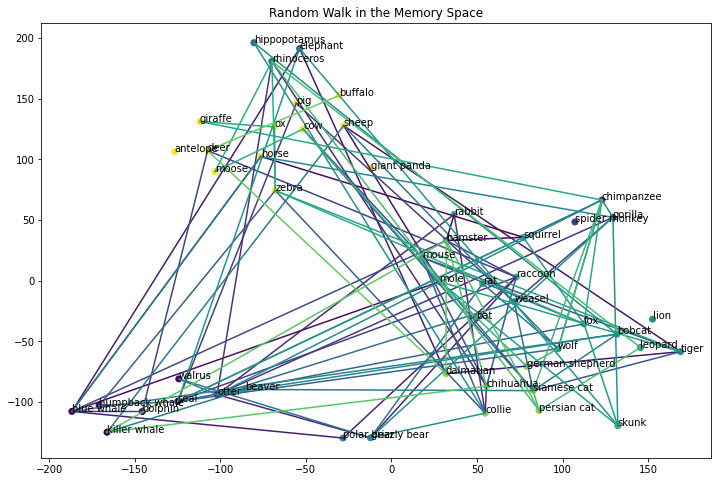

In [407]:
x = tsne_model[:,0]
y = tsne_model[:,1]

fig, ax = plt.subplots()
ax.scatter(x,y,c=affinity_clustering.labels_)

alpha_span = np.linspace(0,0.25,num=len(markov_run))

for i in range(len(markov_run) - 1):
    xs = markov_x[i:i+2]
    ys = markov_y[i:i+2]
    color = cm.viridis(2*i)
    ax.plot(xs, ys, c=color, alpha=1)
    
# ax.plot(markov_x, markov_y, c="red")

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("Random Walk in the Memory Space")
plt.savefig("figures/random_walks/walk_beta_{}_seed_{}.png".format(beta, seed))

### Graph distance between transitions

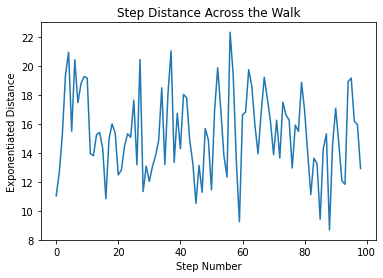

In [408]:
points_in_walk = hidden_unit_activations[markov_run, :]

num_steps = points_in_walk.shape[0]

distances = []

for i in range(num_steps - 1):
    point_from = points_in_walk[i,:]
    point_to = points_in_walk[i+1,:]
#     similarity = cos_sim(point_to, point_from)
#     distances.append(similarity)
    distance = np.linalg.norm(point_to - point_from)**beta
    distances.append(distance)
    
plt.plot(distances)
plt.title("Step Distance Across the Walk")
plt.xlabel("Step Number")
plt.ylabel("Exponentiated Distance")

plt.savefig("figures/random_walks/distances_beta_{}_seed_{}.png".format(beta, seed))

To do with random walks:

Show the order of the walk
Show the distance between steps of the walk over time (could average over many walks)
When are the clusters exhausted?